In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform (X_train)

df_valid = pd.read_csv('./processed_data/df_valid.csv')
X_valid = df_valid.drop('label', axis=1)
X_valid_norm = norm.transform(X_valid)
y_valid = df_valid['label']

df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
X_test_norm = norm.transform(X_test)
y_test = df_test['label']

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

In [3]:
print(X_train_norm.shape, y_train.shape)
print(X_valid_norm.shape, y_valid.shape)
print(X_test_norm.shape, y_test.shape)

(35700, 104) (35700,)
(11900, 104) (11900,)
(11900, 104) (11900,)


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=(104,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               31500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 62,307
Trainable params: 62,307
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_norm, y_train, epochs=300,
                    validation_data=(X_valid_norm, y_valid))

Epoch 1/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.4439 - accuracy: 0.8423 - val_loss: 0.3521 - val_accuracy: 0.8881
Epoch 2/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.4316 - accuracy: 0.8466 - val_loss: 0.4176 - val_accuracy: 0.8335
Epoch 3/150
1116/1116 [==============================] - 4s 3ms/step - loss: 0.4338 - accuracy: 0.8436 - val_loss: 0.3985 - val_accuracy: 0.8522
Epoch 4/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.4436 - accuracy: 0.8430 - val_loss: 0.3884 - val_accuracy: 0.8414
Epoch 5/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.4349 - accuracy: 0.8445 - val_loss: 0.4056 - val_accuracy: 0.8280
Epoch 6/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.4269 - accuracy: 0.8482 - val_loss: 0.4022 - val_accuracy: 0.8540
Epoch 7/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.4336 - accuracy: 0.8442 - val_loss: 0.5783 - val_ac

1116/1116 [==============================] - 4s 3ms/step - loss: 0.3902 - accuracy: 0.8611 - val_loss: 0.3410 - val_accuracy: 0.8753
Epoch 58/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3773 - accuracy: 0.8665 - val_loss: 0.3434 - val_accuracy: 0.8781
Epoch 59/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3775 - accuracy: 0.8648 - val_loss: 0.3095 - val_accuracy: 0.9039
Epoch 60/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3822 - accuracy: 0.8642 - val_loss: 0.5340 - val_accuracy: 0.7950
Epoch 61/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3903 - accuracy: 0.8597 - val_loss: 0.3301 - val_accuracy: 0.8704
Epoch 62/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3762 - accuracy: 0.8648 - val_loss: 0.4491 - val_accuracy: 0.8165
Epoch 63/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3769 - accuracy: 0.8652 - val_loss: 0.3292 - val_accuracy

1116/1116 [==============================] - 4s 4ms/step - loss: 0.3528 - accuracy: 0.8746 - val_loss: 0.4210 - val_accuracy: 0.8096
Epoch 114/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3440 - accuracy: 0.8761 - val_loss: 0.3428 - val_accuracy: 0.8734
Epoch 115/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3488 - accuracy: 0.8754 - val_loss: 0.4103 - val_accuracy: 0.8338
Epoch 116/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3457 - accuracy: 0.8750 - val_loss: 0.3372 - val_accuracy: 0.8734
Epoch 117/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3428 - accuracy: 0.8762 - val_loss: 0.3568 - val_accuracy: 0.8442
Epoch 118/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3446 - accuracy: 0.8752 - val_loss: 0.3500 - val_accuracy: 0.8761
Epoch 119/150
1116/1116 [==============================] - 4s 4ms/step - loss: 0.3456 - accuracy: 0.8759 - val_loss: 0.4568 - val_ac

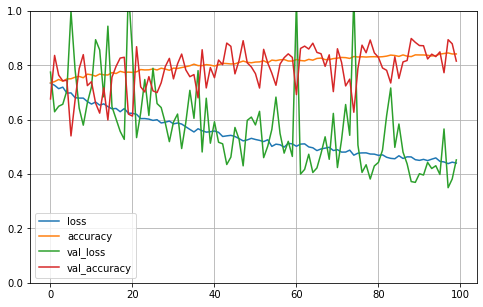

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test_norm, y_test)